## Library

In [1]:
import math
import random
import numpy as np
import squigglepy as sq
import matplotlib.pyplot as plt

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint

exec(open('utils.py').read())
print('Loaded')

Loaded


In [2]:
def plot_anchor(anchor, bins=100, alpha=1, label=None):
    plt.hist(anchor, bins=bins, alpha=alpha, label=label)
    if label:
        print(label)
    pprint(sq.get_percentiles(anchor))
    print('-')
    return None


def tai_log_flop_needs(brain, efficiency, transformative_vs_human, horizon_length, scaling_exponent,
                       flops_per_param_per_sec, params=None, ref_params=11.2, ref_params_samples=12,
                       bayes_update=None):
    params_ = brain + efficiency - flops_per_param_per_sec if params is None else params
    dist = ((brain + efficiency + transformative_vs_human + horizon_length + ref_params_samples) -
            (scaling_exponent * ref_params) + (scaling_exponent * params_))
    
    if bayes_update is None:
        return dist
    else:
        return sq.dist_fn(dist, bayes_update)


@np.vectorize
def cotra_bayes_update_against_low_flop(f):
    f = f + ~sq.norm(1,3) if f < 27 and random.random() > 0.3 else f
    f = f + ~sq.norm(1,3) if f < 26 and random.random() > 0.2 else f
    f = f + ~sq.norm(1,3) if f < 25 and random.random() > 0.1 else f
    f = f + ~sq.norm(1,3) if f < 24 else f
    f = 24 if f < 24 else f
    return f


def cotra_anchor(horizon_length, bayes_update=cotra_bayes_update_against_low_flop):
    return tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                              efficiency=1,
                              transformative_vs_human=sq.norm(-2,2),
                              horizon_length=horizon_length,
                              scaling_exponent=sq.norm(0.5,1.1),
                              flops_per_param_per_sec=sq.norm(1,2),
                              bayes_update=bayes_update)


print('Loaded')

Loaded


## Cotra's Short NN Anchor

{1: 25.145575945080097,
 5: 26.420760788510318,
 10: 27.196084504683565,
 20: 28.21731255036749,
 30: 29.285385584669505,
 40: 30.474782196477573,
 50: 31.735783882914298,
 60: 33.006227420872044,
 70: 34.40183353029685,
 80: 36.11113678966329,
 90: 38.46093941250586,
 95: 40.591173454225256,
 99: 44.42512792598455}
-


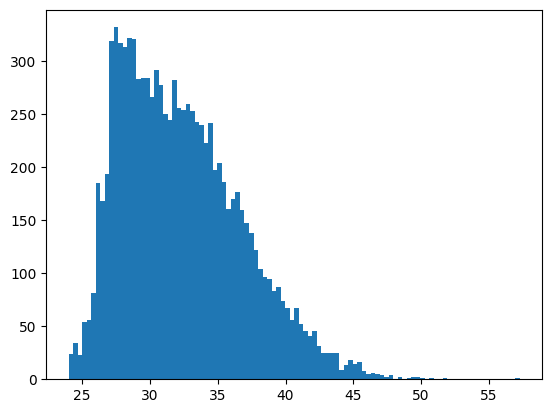

In [3]:
short_horizon_nn_anchor = cotra_anchor(horizon_length=sq.norm(0,3))
plot_anchor(short_horizon_nn_anchor @ 10000)

Cotra's Short NN, Before update
{1: 20.966644526093862,
 5: 24.080596492475554,
 10: 25.698063635445475,
 20: 27.646109335607928,
 30: 29.18053862066049,
 40: 30.445536032434386,
 50: 31.614617974310942,
 60: 32.91097594449081,
 70: 34.25882796957345,
 80: 35.86222686130451,
 90: 38.19882374698588,
 95: 40.12529529126041,
 99: 44.064600923071154}
-
Cotra's Short NN, After update
{1: 25.22204426951341,
 5: 26.364976847582962,
 10: 27.170394509814265,
 20: 28.14089777381534,
 30: 29.192724049039168,
 40: 30.3790942527076,
 50: 31.694266832363148,
 60: 32.98314842114213,
 70: 34.289060663019654,
 80: 35.98051095772377,
 90: 38.37985092053654,
 95: 40.33638366567073,
 99: 44.38429184699936}
-


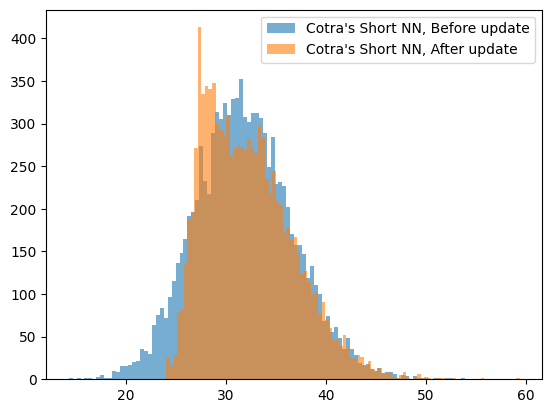

In [4]:
short_no_update = cotra_anchor(horizon_length=sq.norm(0,3), bayes_update=None)
plot_anchor(short_no_update @ 10000, alpha=0.6, label='Cotra\'s Short NN, Before update')
plot_anchor(short_horizon_nn_anchor @ 10000, alpha=0.6, label='Cotra\'s Short NN, After update')
plt.legend()

## Cotra's Medium NN Anchor

{1: 26.323891692679485,
 5: 27.7570026284488,
 10: 28.830022626030768,
 20: 30.70354905809175,
 30: 32.17133810564407,
 40: 33.41015442918388,
 50: 34.652663165949704,
 60: 35.96537096826954,
 70: 37.30702479228285,
 80: 38.9721994140049,
 90: 41.18589744821839,
 95: 43.309850329155225,
 99: 47.257882943000276}
-


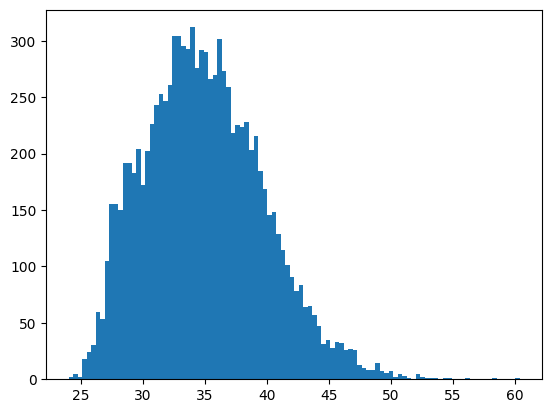

In [5]:
medium_horizon_nn_anchor = cotra_anchor(horizon_length=sq.norm(3,6))
plot_anchor(medium_horizon_nn_anchor @ 10000)

## Cotra's Long NN Anchor

{1: 27.837582285864176,
 5: 30.100623339852685,
 10: 31.707451263551373,
 20: 33.74416706743267,
 30: 35.18637876869301,
 40: 36.472197495254846,
 50: 37.7398601378689,
 60: 38.97354687819639,
 70: 40.41442313167692,
 80: 42.0158977743216,
 90: 44.40190477989414,
 95: 46.44682160385284,
 99: 50.39213291006273}
-


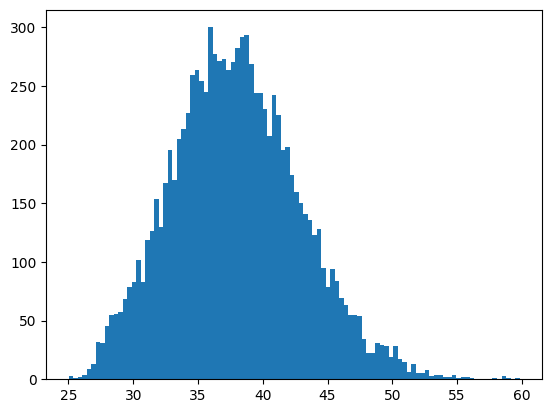

In [6]:
long_horizon_nn_anchor = cotra_anchor(horizon_length=sq.norm(6,9))
plot_anchor(long_horizon_nn_anchor @ 10000)

## Cotra's GPT Anchor

{1: 24.6266626667951,
 5: 25.91018973189908,
 10: 26.549825904140445,
 20: 27.44089413873256,
 30: 28.153838355473834,
 40: 28.943523935169623,
 50: 30.115905383800545,
 60: 31.393468378365643,
 70: 32.78354272925045,
 80: 34.447151457610246,
 90: 36.69175334494075,
 95: 38.638338804173664,
 99: 42.66319689287771}
-


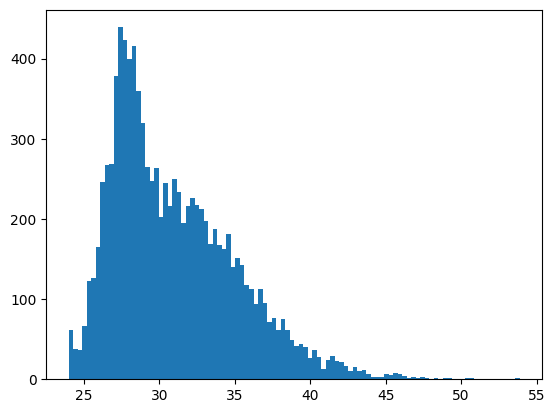

In [7]:
gpt_anchor = cotra_anchor(horizon_length=0)
plot_anchor(gpt_anchor @ 10000)

Cotra's GPT NN, Before update
{1: 19.737924714277774,
 5: 22.791384363476666,
 10: 24.332151481218784,
 20: 26.296728586306035,
 30: 27.70280043781468,
 40: 28.93013542727066,
 50: 30.13480237643607,
 60: 31.359101390362518,
 70: 32.70786965871804,
 80: 34.32685289417917,
 90: 36.64735935002591,
 95: 38.68063963390917,
 99: 42.96186452651799}
-
Cotra's GPT NN, After update
{1: 24.52703710381115,
 5: 25.966008475841274,
 10: 26.533721097280075,
 20: 27.451371580609585,
 30: 28.205061388805298,
 40: 29.08096211278219,
 50: 30.195838913732857,
 60: 31.383147742019297,
 70: 32.74170064034446,
 80: 34.35217466584179,
 90: 36.661191058860005,
 95: 38.91831279077685,
 99: 43.159309966320464}
-


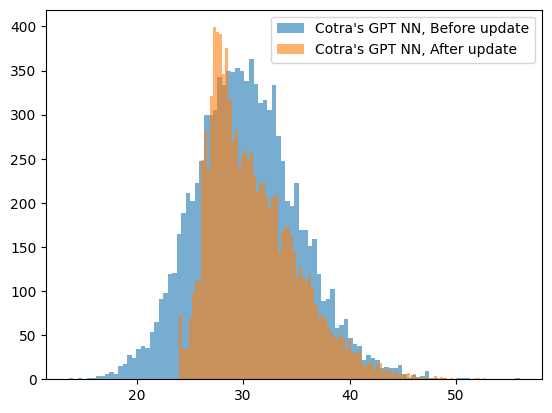

In [8]:
gpt_no_update = cotra_anchor(horizon_length=0, bayes_update=None)
plot_anchor(gpt_no_update @ 10000, alpha=0.6, label='Cotra\'s GPT NN, Before update')
plot_anchor(gpt_anchor @ 10000, alpha=0.6, label='Cotra\'s GPT NN, After update')
plt.legend()

## Cotra's Lifetime Anchor

{1: 25.16464523323166,
 5: 26.125947994101363,
 10: 26.604790724750675,
 20: 27.272937863045716,
 30: 27.779632429421493,
 40: 28.304834336310957,
 50: 28.91211980914327,
 60: 29.645171297603493,
 70: 30.660498105695744,
 80: 31.802346145756495,
 90: 33.51315936312995,
 95: 34.846793275682025,
 99: 37.51922256711967}
-


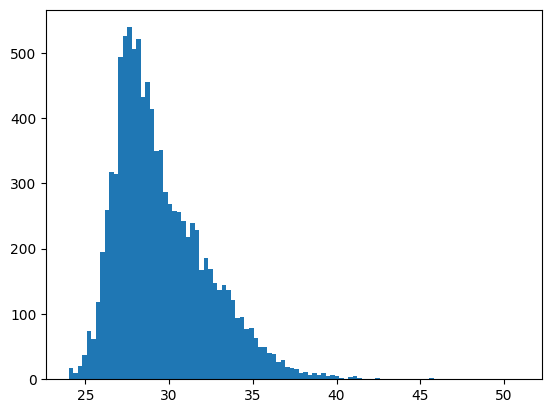

In [9]:
lifetime_anchor = tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                     efficiency=sq.mixture([sq.lognorm(2,5),
                                                            sq.lognorm(5,9)]),
                                     transformative_vs_human=sq.norm(-2,2),
                                     horizon_length=9,
                                     scaling_exponent=0,
                                     flops_per_param_per_sec=0,
                                     ref_params_samples=0,
                                     bayes_update=cotra_bayes_update_against_low_flop)
plot_anchor(lifetime_anchor @ 10000)

## Cotra's Evolution Anchor

{1: 32.203305783510196,
 5: 34.7163368336657,
 10: 36.0544122715353,
 20: 37.71188766089733,
 30: 38.82878640632183,
 40: 39.85735828214889,
 50: 40.810736305462356,
 60: 41.77425172559722,
 70: 42.82372313335674,
 80: 43.987000275571255,
 90: 45.662424690874246,
 95: 47.02595511705287,
 99: 49.682077780540354}
-


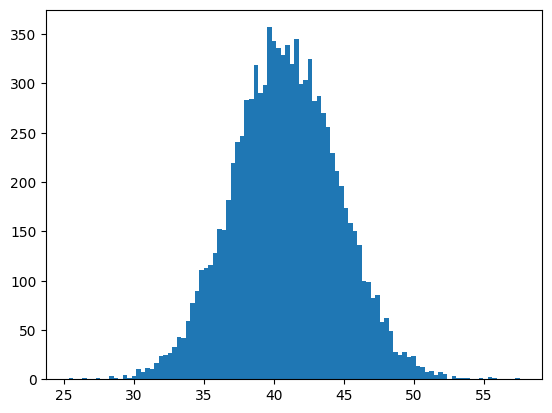

In [10]:
average_ancestor_brain_flops = sq.lognorm(3,6)
log_n_individuals = sq.norm(20,22)
evo_time_log_sec = 16
evolution_anchor = tai_log_flop_needs(brain=average_ancestor_brain_flops,
                                      efficiency=sq.norm(-6,5), # TODO: This seems not quite right
                                      transformative_vs_human=sq.norm(-2,2),
                                      horizon_length=log_n_individuals + evo_time_log_sec,
                                      scaling_exponent=0,
                                      flops_per_param_per_sec=0,
                                      ref_params_samples=0,
                                      bayes_update=None)
plot_anchor(evolution_anchor @ 10000)


## Cotra's Genome Anchor

{1: 26.772879604939376,
 5: 27.997856838624504,
 10: 28.96558262727787,
 20: 30.516883456949387,
 30: 31.73196534220673,
 40: 32.775770000414674,
 50: 33.767320306008486,
 60: 34.7161617810678,
 70: 35.801146979388086,
 80: 37.00992284585584,
 90: 38.93371587747203,
 95: 40.527914500697484,
 99: 43.72523639876118}
-


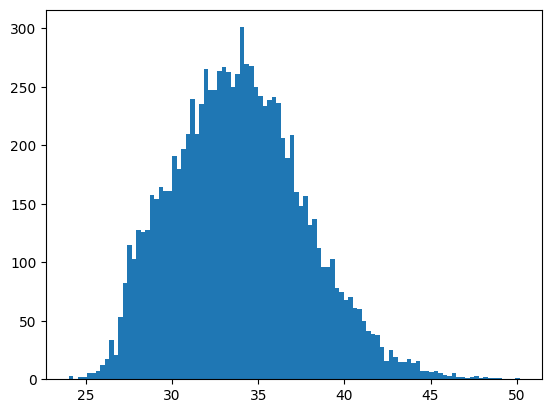

In [11]:
genome_anchor = tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                   params=sq.norm(mean=8.7, sd=0.35), # There are ~10^8.7 'params' in genome
                                   efficiency=sq.norm(0,2),
                                   transformative_vs_human=sq.norm(-2,2),
                                   horizon_length=sq.norm(7,9),
                                   scaling_exponent=sq.norm(0.5,1.1),
                                   flops_per_param_per_sec=sq.norm(1,2),
                                   bayes_update=cotra_bayes_update_against_low_flop)
plot_anchor(genome_anchor @ 10000)


## All Cotra Anchors

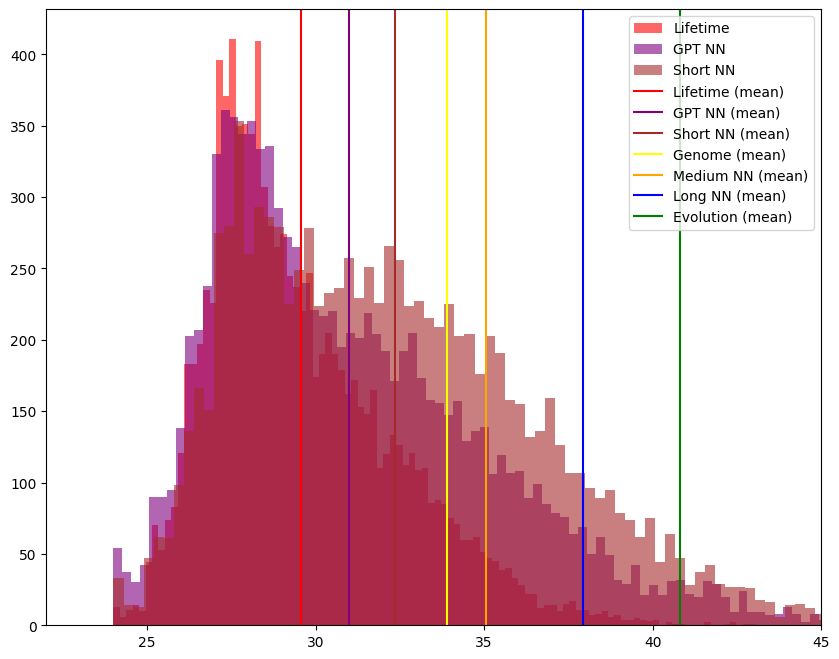

In [12]:
def plot_anchor_means():
    plt.axvline(np.mean(lifetime_anchor @ 10000), label='Lifetime (mean)', color='red')
    plt.axvline(np.mean(gpt_anchor @ 10000), label='GPT NN (mean)', color='purple')
    plt.axvline(np.mean(short_horizon_nn_anchor @ 10000), label='Short NN (mean)', color='brown')
    plt.axvline(np.mean(genome_anchor @ 10000), label='Genome (mean)', color='yellow')
    plt.axvline(np.mean(medium_horizon_nn_anchor @ 10000), label='Medium NN (mean)', color='orange')
    plt.axvline(np.mean(long_horizon_nn_anchor @ 10000), label='Long NN (mean)', color='blue')
    plt.axvline(np.mean(evolution_anchor @ 10000), label='Evolution (mean)', color='green')

    
alpha = 0.6
bins = 100

plt.figure(figsize=(10,8))
plt.hist(lifetime_anchor @ 10000, bins=bins, alpha=alpha, label='Lifetime', color='red', lw=0)
plt.hist(gpt_anchor @ 10000, bins=bins, alpha=alpha, label='GPT NN', color='purple', lw=0)
plt.hist(short_horizon_nn_anchor @ 10000, bins=bins, alpha=alpha, label='Short NN', color='brown', lw=0)
plot_anchor_means()
plt.xlim([22, 45])
plt.legend()
plt.show()

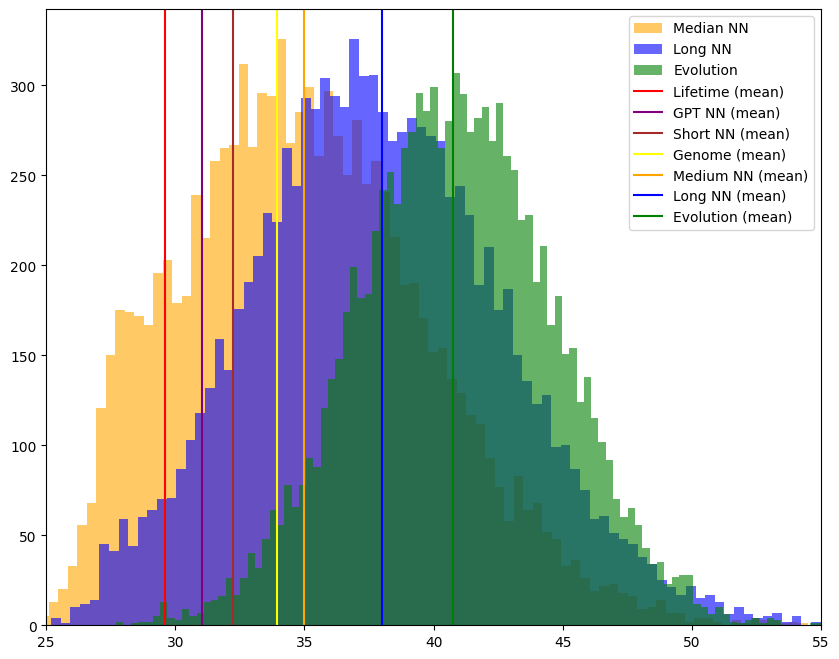

In [13]:
plt.figure(figsize=(10,8))
plt.hist(medium_horizon_nn_anchor @ 10000, bins=bins, alpha=alpha, label='Median NN', color='orange', lw=0)
plt.hist(long_horizon_nn_anchor @ 10000, bins=bins, alpha=alpha, label='Long NN', color='blue', lw=0)
plt.hist(evolution_anchor @ 10000, bins=bins, alpha=alpha, label='Evolution', color='green', lw=0)
plot_anchor_means()
plt.xlim([25, 55])
plt.legend()
plt.show()

## Simple Lifetime Anchor

Simple lifetime, before update
{1: 18.73214499196532,
 5: 19.975886760044045,
 10: 20.724031172975902,
 20: 21.66521619572744,
 30: 22.380111707373867,
 40: 23.058362567881503,
 50: 23.69643462880112,
 60: 24.355836922930063,
 70: 25.065185166393572,
 80: 25.979632877417913,
 90: 27.305650136911968,
 95: 28.564932403724335,
 99: 31.233280292513356}
-
Simple lifetime, after update
{1: 24.0,
 5: 24.600476227535662,
 10: 25.077081815181373,
 20: 25.545096926320802,
 30: 25.995895098679085,
 40: 26.30766068516851,
 50: 26.639939685202506,
 60: 26.991332387076703,
 70: 27.33870267796295,
 80: 27.767430709911807,
 90: 28.3648490592063,
 95: 28.98469127109482,
 99: 30.911970052308888}
-
Cotra's lifetime anchor
{1: 25.105475573617472,
 5: 26.067902547177773,
 10: 26.578178547629786,
 20: 27.28651316008889,
 30: 27.80211425416173,
 40: 28.333468809951636,
 50: 28.981855447987414,
 60: 29.748247194888698,
 70: 30.680168192678586,
 80: 31.86923264385125,
 90: 33.51762268098939,
 95: 34.9091921075

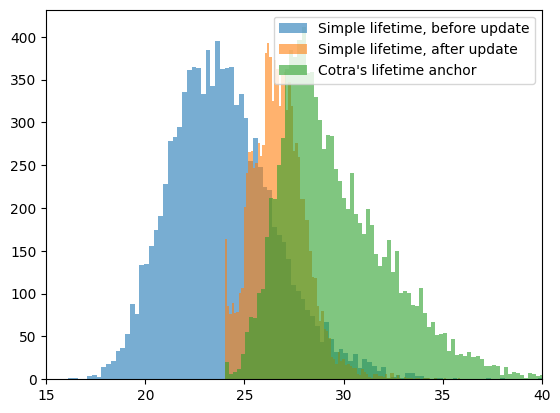

In [14]:
simple_lifetime_anchor = tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                            efficiency=0,
                                            transformative_vs_human=0,
                                            horizon_length=9,
                                            scaling_exponent=0,
                                            flops_per_param_per_sec=0,
                                            ref_params_samples=0,
                                            bayes_update=cotra_bayes_update_against_low_flop)

simple_lifetime_anchor_noup = tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                                 efficiency=0,
                                                 transformative_vs_human=0,
                                                 horizon_length=9,
                                                 scaling_exponent=0,
                                                 flops_per_param_per_sec=0,
                                                 ref_params_samples=0,
                                                 bayes_update=None)

plot_anchor(simple_lifetime_anchor_noup @ 10000, alpha=0.6, label='Simple lifetime, before update')
plot_anchor(simple_lifetime_anchor @ 10000, alpha=0.6, label='Simple lifetime, after update')
plot_anchor(lifetime_anchor @ 10000, alpha=0.6, label='Cotra\'s lifetime anchor')
plt.xlim([15, 40])
plt.legend()


## Updated Evolution Anchor

Cotra's evolution anchor
{1: 32.30631722362264,
 5: 34.6598802009786,
 10: 36.01662996391177,
 20: 37.67522894655754,
 30: 38.82941503617086,
 40: 39.87599444079314,
 50: 40.88877044557813,
 60: 41.83125053788219,
 70: 42.805988460655854,
 80: 44.017462854556264,
 90: 45.593692043450574,
 95: 46.96734491578592,
 99: 49.61268454458735}
-
Updated evolution anchor
{1: 32.19029299320472,
 5: 34.90478946175219,
 10: 36.288606344739655,
 20: 37.9774421902608,
 30: 39.171259862077086,
 40: 40.2336048604006,
 50: 41.22261941042362,
 60: 42.227277746148175,
 70: 43.31193337208152,
 80: 44.65004286341222,
 90: 46.43188701288569,
 95: 47.9571200390853,
 99: 50.877017555522144}
-


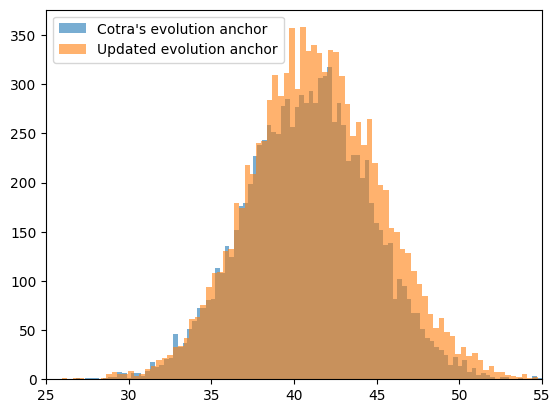

In [15]:
anthropic_adjustment = sq.norm(-1.3,1.3)
environment_adjustment = sq.mixture([[0.2, sq.lognorm(1,5)], [0.8, 0]])
    
updated_evolution_anchor = evolution_anchor + anthropic_adjustment + environment_adjustment
plot_anchor(evolution_anchor @ 10000, alpha=alpha, label='Cotra\'s evolution anchor')
plot_anchor(updated_evolution_anchor @ 10000, alpha=alpha, label='Updated evolution anchor')
plt.xlim([25, 55])
plt.legend()


## Meta-anchor

### Horizon length

{1: 0.0,
 5: 0.0,
 10: 0.0,
 20: 0.0,
 30: 0.0,
 40: 0.0,
 50: 1.563712097206949,
 60: 3.0407532494386222,
 70: 4.377055522686284,
 80: 5.751781966077555,
 90: 8.543321332077765,
 95: 9.572583746884801,
 99: 10.839000066063935}
-


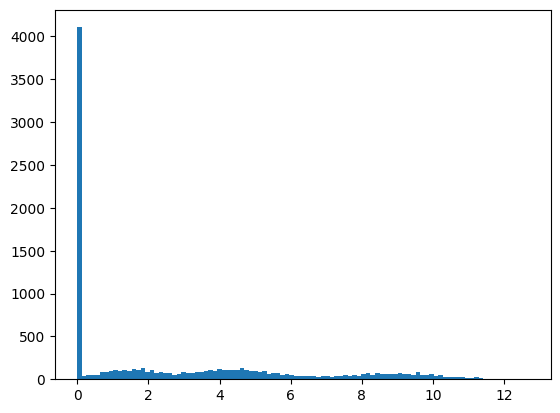

In [16]:
meta_horizon_length = sq.mixture([[0.4, 0],
                                  [0.2, sq.norm(0,3)],
                                  [0.25, sq.lognorm(3,7)],
                                  [0.15, sq.norm(7,11)]], lclip=0)

plot_anchor(meta_horizon_length @ 10000)

100%|██████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 4116502.11it/s]


Writing cache to file `caches/meta_anchor.sqcache.npy`...
...Cached
{1: 20.045682037721935,
 5: 24.060911735587453,
 10: 25.292763406013908,
 20: 26.905575948274755,
 30: 28.730688119443748,
 40: 30.73025347871559,
 50: 32.54306015655732,
 60: 34.48093681248623,
 70: 36.63812523525167,
 80: 39.209648394722635,
 90: 42.86429739184473,
 95: 45.79532218086243,
 99: 52.376143622331945}
-


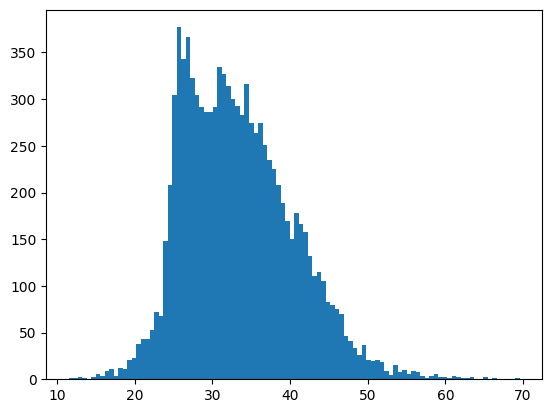

In [17]:
@np.vectorize
def peter_bayes_update_against_low_flop(f):
    f = f + sq.sample(sq.norm(1,3)) if f < 27 and random.random() > 0.9 else f
    f = f + sq.sample(sq.norm(1,3)) if f < 26 and random.random() > 0.8 else f
    f = f + sq.sample(sq.norm(1,3)) if f < 25 and random.random() > 0.4 else f
    f = f + sq.sample(sq.norm(1,3)) if f < 24 and random.random() > 0.1 else f
    return f

meta_anchor = tai_log_flop_needs(brain=sq.lognorm(11,19.5),
                                 efficiency=sq.norm(-1,2),
                                 transformative_vs_human=sq.norm(-2,2),
                                 horizon_length=meta_horizon_length,
                                 scaling_exponent=sq.norm(0.5,1.5),
                                 flops_per_param_per_sec=sq.norm(1,2),
                                 bayes_update=peter_bayes_update_against_low_flop)
meta_anchor_samples = sq.sample(meta_anchor, dump_cache_file='caches/meta_anchor', n=10000, verbose=True)
plot_anchor(meta_anchor_samples)


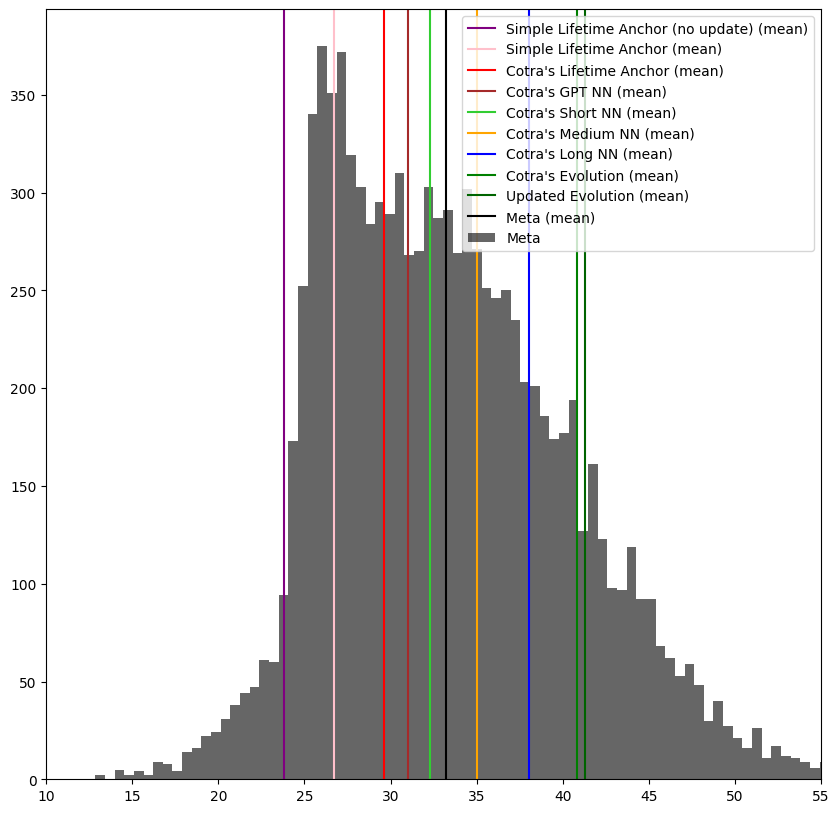

In [18]:
plt.figure(figsize=(10,10))
plt.axvline(x = np.mean(simple_lifetime_anchor_noup @ 10000), label='Simple Lifetime Anchor (no update) (mean)', color='purple')
plt.axvline(x = np.mean(simple_lifetime_anchor @ 10000), label='Simple Lifetime Anchor (mean)', color='pink')
plt.axvline(x = np.mean(lifetime_anchor @ 10000), label='Cotra\'s Lifetime Anchor (mean)', color='red')
plt.axvline(x = np.mean(gpt_anchor @ 10000), label='Cotra\'s GPT NN (mean)', color='brown')
plt.axvline(x = np.mean(short_horizon_nn_anchor @ 10000), label='Cotra\'s Short NN (mean)', color='limegreen')
plt.axvline(x = np.mean(medium_horizon_nn_anchor @ 10000), label='Cotra\'s Medium NN (mean)', color='orange')
plt.axvline(x = np.mean(long_horizon_nn_anchor @ 10000), label='Cotra\'s Long NN (mean)', color='blue')
plt.axvline(x = np.mean(evolution_anchor @ 10000), label='Cotra\'s Evolution (mean)', color='green')
plt.axvline(x = np.mean(updated_evolution_anchor @ 10000), label='Updated Evolution (mean)', color='darkgreen')
plt.axvline(x = np.mean(meta_anchor @ 10000), label='Meta (mean)', color='black')
plt.hist(meta_anchor @ 10000, bins=bins, alpha=alpha, label='Meta', color='black', lw=0)
plt.xlim([10, 55])
plt.legend()
plt.show()

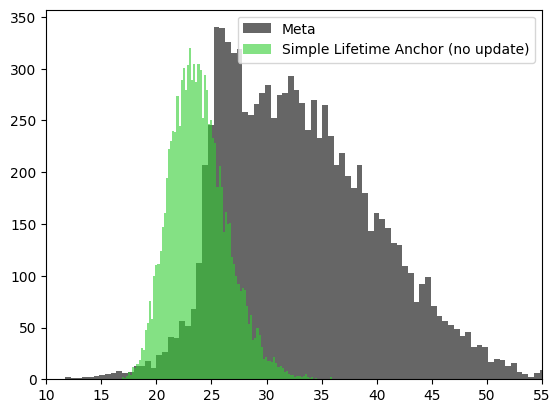

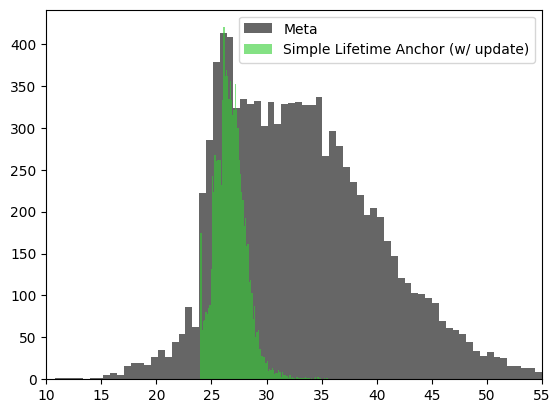

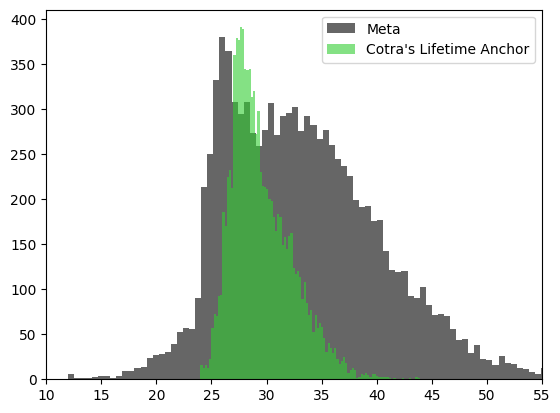

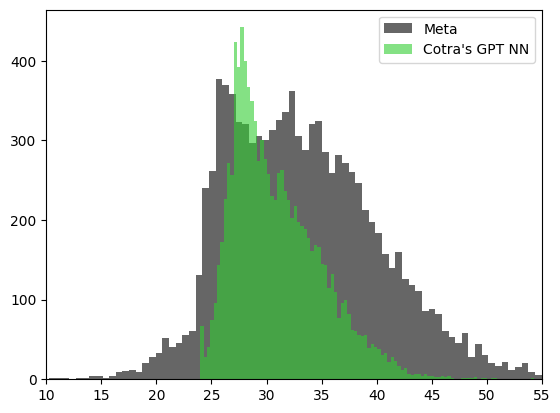

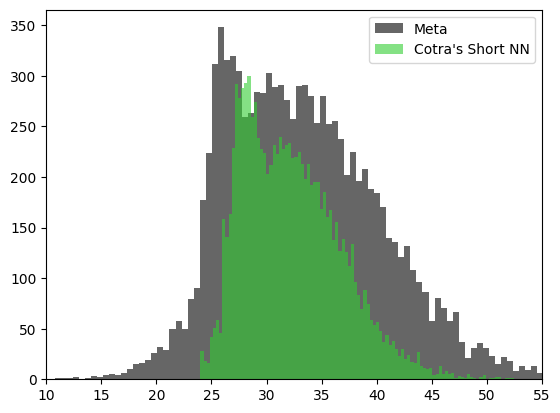

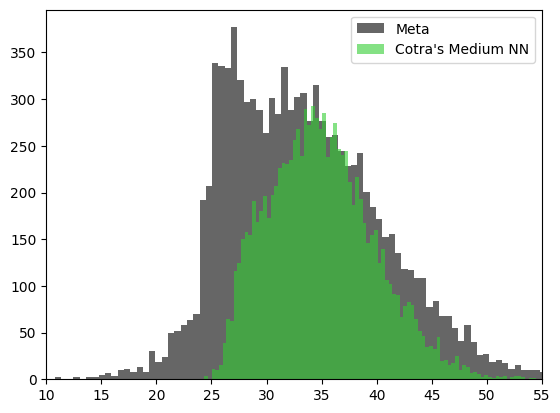

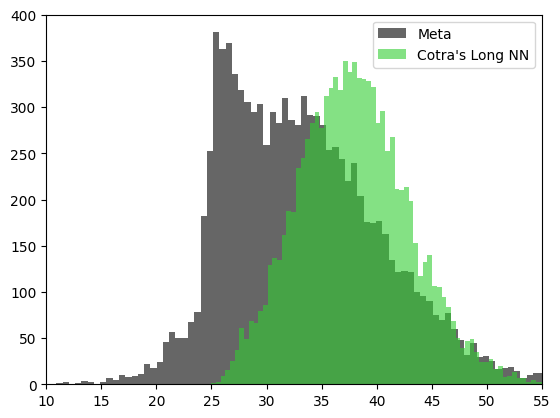

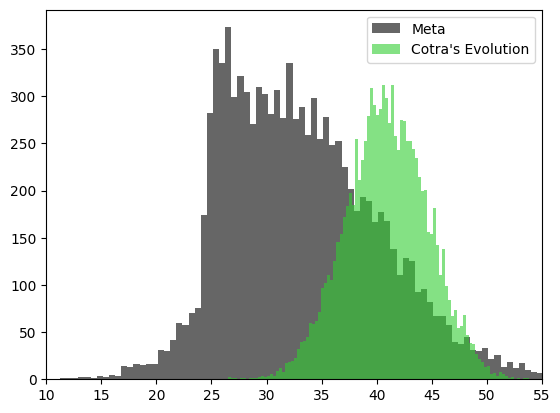

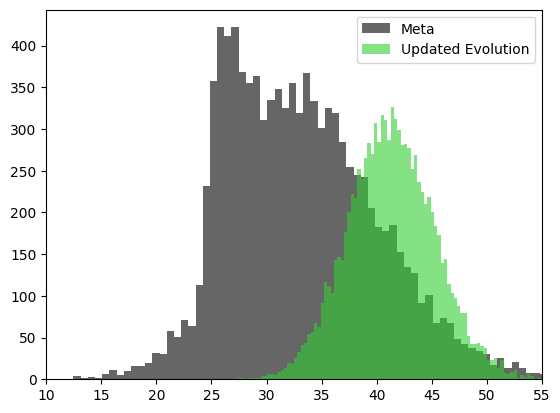

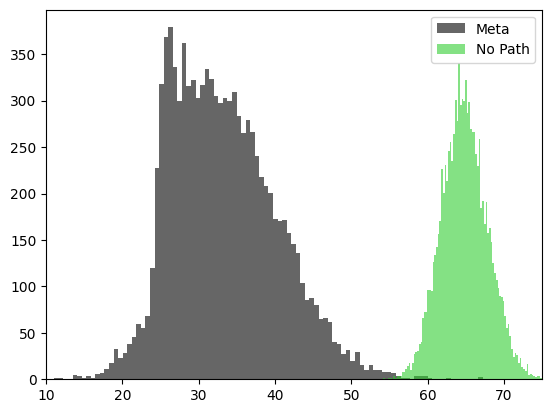

In [19]:
no_path_anchor = sq.lognorm(60,70)

for anchors in [[simple_lifetime_anchor_noup @ 10000, 'Simple Lifetime Anchor (no update)'],
                [simple_lifetime_anchor @ 10000, 'Simple Lifetime Anchor (w/ update)'],
                [lifetime_anchor @ 10000, 'Cotra\'s Lifetime Anchor'],
                [gpt_anchor @ 10000, 'Cotra\'s GPT NN'],
                [short_horizon_nn_anchor @ 10000, 'Cotra\'s Short NN'],
                [medium_horizon_nn_anchor @ 10000, 'Cotra\'s Medium NN'],
                [long_horizon_nn_anchor @ 10000, 'Cotra\'s Long NN'],
                [evolution_anchor @ 10000, 'Cotra\'s Evolution'],
                [updated_evolution_anchor @ 10000, 'Updated Evolution'],
                [no_path_anchor @ 10000, 'No Path']]:
    plt.hist(meta_anchor @ 10000, bins=bins, alpha=alpha, label='Meta', color='black', lw=0)
    plt.hist(anchors[0], bins=bins, alpha=alpha, label=anchors[1], color='limegreen', lw=0)
    plt.xlim([10, 75 if anchors[1] == 'No Path' else 55])
    plt.legend()
    plt.show()

100%|█████████████████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1611.91it/s]


Writing cache to file `caches/cotra_2020.sqcache.npy`...
...Cached
{1: 26.028636470144466,
 5: 27.38681101472101,
 10: 28.35840656489138,
 20: 30.339093534143593,
 30: 32.00616470319611,
 40: 33.60458524686338,
 50: 35.12696180066097,
 60: 36.75073114198588,
 70: 38.659369256086194,
 80: 41.05198196862732,
 90: 45.377817829264195,
 95: 63.17890929783547,
 99: 68.19335815544521}
-


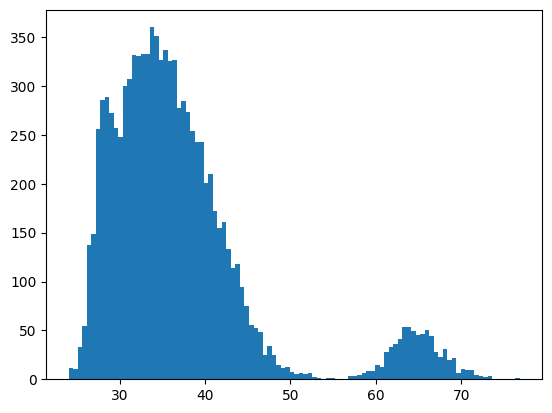

In [20]:
cotra_2020 = sq.mixture([[0.052, lifetime_anchor],
                         [0.21, short_horizon_nn_anchor],
                         [0.11, genome_anchor],
                         [0.312, medium_horizon_nn_anchor],
                         [0.155, long_horizon_nn_anchor],
                         [0.091, evolution_anchor],
                         [0.07, no_path_anchor]])
cotra_2020_samples = sq.sample(cotra_2020, dump_cache_file='caches/cotra_2020', n=10000, verbose=True)
plot_anchor(cotra_2020_samples)


100%|█████████████████████████████████████████████████████████| 10000/10000 [00:08<00:00, 1214.86it/s]


Writing cache to file `caches/cotra_2022.sqcache.npy`...
...Cached
{1: 25.472769068935733,
 5: 27.018365817977305,
 10: 27.788843520026056,
 20: 29.282099177505096,
 30: 30.906652956011055,
 40: 32.436286728577315,
 50: 33.895660337652714,
 60: 35.39417482229282,
 70: 37.04323107569977,
 80: 39.139440007219605,
 90: 42.64211352781332,
 95: 49.086119234057946,
 99: 67.47313854692979}
-


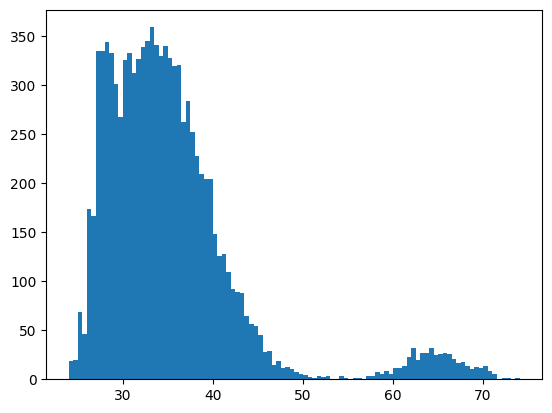

In [21]:
cotra_2022 = sq.mixture([[0.1, gpt_anchor],
                         [0.33, short_horizon_nn_anchor],
                         [0.09, genome_anchor],
                         [0.34, medium_horizon_nn_anchor],
                         [0.04, long_horizon_nn_anchor],
                         [0.05, evolution_anchor],
                         [0.05, no_path_anchor]])
cotra_2022_samples = sq.sample(cotra_2022, dump_cache_file='caches/cotra_2022', n=10000, verbose=True)
plot_anchor(cotra_2022_samples)


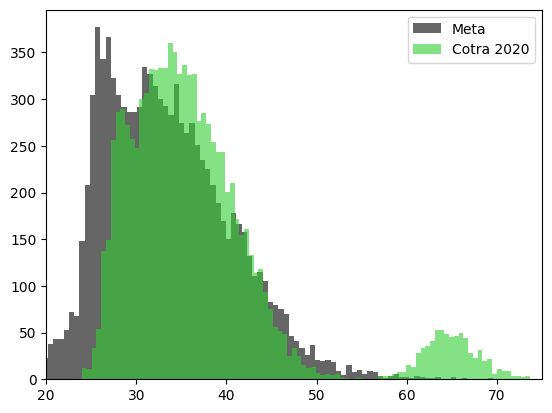

In [22]:
plt.hist(meta_anchor_samples, bins=bins, alpha=alpha, label='Meta', color='black', lw=0)
plt.hist(cotra_2020_samples, bins=bins, alpha=alpha, label='Cotra 2020', color='limegreen', lw=0)
plt.xlim([20, 75])
plt.legend()
plt.show()


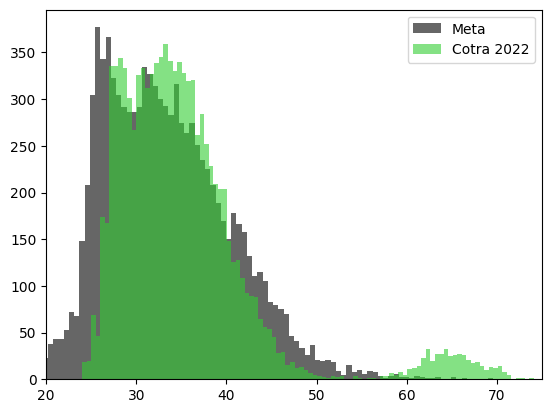

In [23]:
plt.hist(meta_anchor_samples, bins=bins, alpha=alpha, label='Meta', color='black', lw=0)
plt.hist(cotra_2022_samples, bins=bins, alpha=alpha, label='Cotra 2022', color='limegreen', lw=0)
plt.xlim([20, 75])
plt.legend()
plt.show()


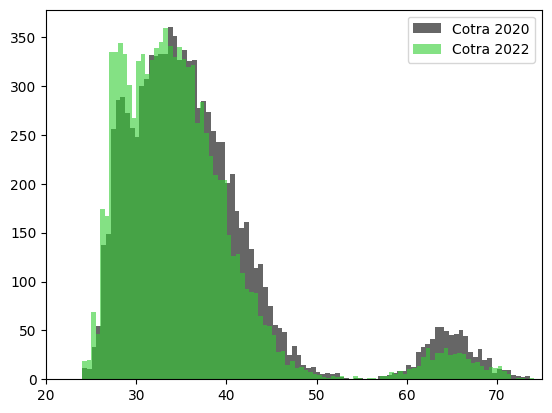

In [24]:
plt.hist(cotra_2020_samples, bins=bins, alpha=alpha, label='Cotra 2020', color='black', lw=0)
plt.hist(cotra_2022_samples, bins=bins, alpha=alpha, label='Cotra 2022', color='limegreen', lw=0)
plt.xlim([20, 75])
plt.legend()
plt.show()
